In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score

In [202]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Aufgabe: Ein Unternehmen möchte einen E-Mail-Spam-Filter entwickeln, der automatisch eingehende E-Mails als "Spam" oder "Nicht-Spam" klassifiziert. Ihre Aufgabe ist es, einen Naive Bayes-Algorithmus in Python zu implementieren, um dieses Problem zu lösen.

**Zuerst müssen die Daten eingelesen und vorbereitet werden**

In [211]:
# Daten einlesen und Vorbereiten
df = pd.read_csv('/content/drive/MyDrive/Python_DataScience/ML/spam.csv', encoding='iso-8859-1') #.csv-Pfad einfügen
print(df.describe(),"\n")

# "ham" und "spam" durch 0 und 1 ersetzen (ham = 0, spam = 1)
df["v1"] = df["v1"].replace({"ham": 0, "spam": 1})

count_spam = df[df["v1"] == 1].shape[0] # shape gibt einen Tuple als Rückwert mit Anzahl der Zeilen und Spalten: [0] = Zeilenanzahl, [1] = Spaltenanzahl
count_ham = df[df["v1"] == 0].shape[0]  # Da uns hier nur die Anzahl der Zeilen (Werte) interessiert, geben wir hier .shape[0] an
# print(df.head())
print("Anzahl Spam-Mails:", count_spam)
print("Anzahl Nicht-Spam-Mails:", count_ham, "\n")


          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2   

Anzahl Spam-Mails: 747
Anzahl Nicht-Spam-Mails: 4825 



**Danach werden die benötigten Schritte in Funktionen geschrieben (Vektorisierung der Texte, Modelltraining, Modellanwendung, etc.**

In [204]:
# Funktionen erstellen

def vekto(input):
    # Vektorisierung der Texte (Wörter zählen)
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(input)
    return X, vectorizer

def model_train(X, y):
    # Trainieren des Modells
    model = MultinomialNB()
    model.fit(X, y)
    return model

def forecast(model, X):
    # Vorhersage
    predictions = model.predict(X)
    return predictions

def metrics(y, predictions):
    # Berechnung der Metriken
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    f1 = f1_score(y, predictions)
    return accuracy, precision, recall, f1

def print_metrics(accuracy, precision, recall, f1):
    # Ausgabe der Metriken
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1, "\n")

def confusion_matrix_plot(y, predictions):
    # Konfusionsmatrix plotten
    conf_matrix = confusion_matrix(y, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Nicht-Spam", "Spam"])
    disp.plot(cmap='GnBu')
    disp.ax_.set_title("Konfusionsmatrix")
    disp.ax_.set_xlabel("Vorhergesagt")
    disp.ax_.set_ylabel("Tatsächlich")
    disp.figure_.tight_layout()
    plt.show()

def test_mail(test_mail, model, vectorizer):
    # Benutzereingabe für eine neue E-Mail
    new_email = test_mail

    # Die neue Mail muss in eine Liste gepackt werden, denn der Vectorizer erwartet eine Liste
    new_email = [new_email]

    # Der gefittete Vectorizer wird als Argument übergeben und hier angewandt
    new_X = vectorizer.transform(new_email)
    # print(new_X)
    new_prediction = model.predict(new_X)

    print("Die Vorhersage für die neue E-Mail lautet: Die Nachricht ''", test_mail, "'' ist: Spam" if new_prediction[0] == 1 else "'' ist: kein Spam")


Der Code wird nun ausgeführt

Accuracy: 0.9784688995215312
Precision: 0.9178082191780822
Recall: 0.9178082191780822
F1-Score: 0.9178082191780822 



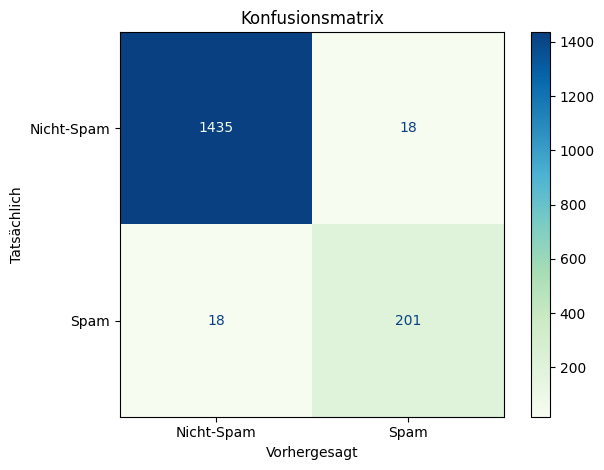


Kreuzvalidierung:
Kreuzvalidierungs-Genauigkeiten: [0.98708752 0.98134864 0.98134864 0.9784792  0.97701149 0.98275862
 0.97126437 0.98850575]
Durchschnittliche Genauigkeit der Kreuzvalidierung: 0.980975527300912 

Die Vorhersage für die neue E-Mail lautet: Die Nachricht '' win a new iphone 15 pro, click here: www.win.to '' ist: Spam


In [205]:
def main():
    # 1. Daten einlesen
    emails = df["v2"]
    labels = df["v1"]
    y = labels

    # 2. Vektorisierung
    X, fitted_vecto = vekto(emails)

    # 3. Aufteilung in Trainings- und Testdatensatz
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 4. Modelltraining mit Trainingsdaten
    model = model_train(X_train, y_train)

    # 5. Vorhersage auf Testdaten
    predictions = forecast(model, X_test)

    # 6. Berechnung der Metriken auf Testdaten
    accuracy, precision, recall, f1 = metrics(y_test, predictions)
    print_metrics(accuracy, precision, recall, f1)

    # 7. Konfusionsmatrix plotten
    confusion_matrix_plot(y_test, predictions)

    # 8. Kreuzvalidierung zur besseren Einschätzung der Modellleistung
    print("\nKreuzvalidierung:")
    cross_val_scores = cross_val_score(model, X, y, cv=8, scoring='accuracy')
    print("Kreuzvalidierungs-Genauigkeiten:", cross_val_scores)
    print("Durchschnittliche Genauigkeit der Kreuzvalidierung:", cross_val_scores.mean(), "\n")

    # 9. Benutzereingabe für eine neue E-Mail
    check_mail = "win a new iphone 15 pro, click here: www.win.to"
    test_mail(check_mail, model, fitted_vecto)

# Programmstart
if __name__ == "__main__":
    main()